In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

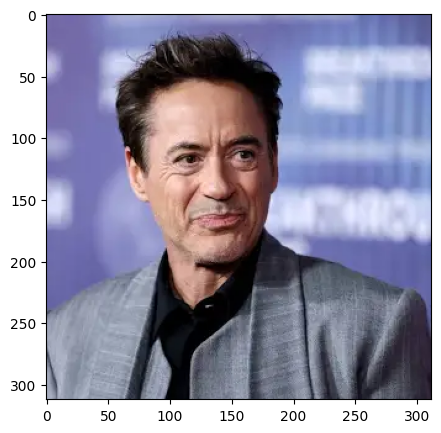

In [51]:
img=cv2.imread("../img/rdj.webp")

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(img[..., ::-1])
plt.show()

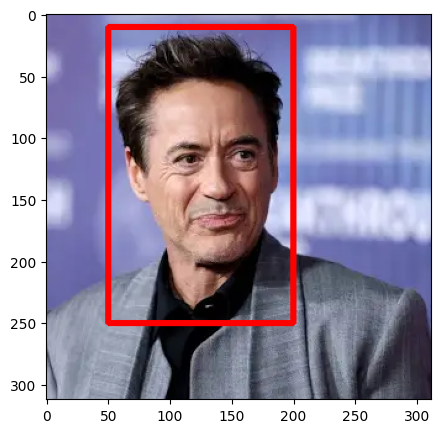

In [64]:
imgCopy=img.copy()
mask=np.zeros(img.shape[:2],np.uint8)

x1,y1,x2,y2=50,10,200,250
start=(x1,y1)
end=(x2,y2)

rect=(x1,y1,x2-x1,y2-y1)
cv2.rectangle(imgCopy,start,end,(0,0,255),3)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imgCopy[..., ::-1])
plt.show()

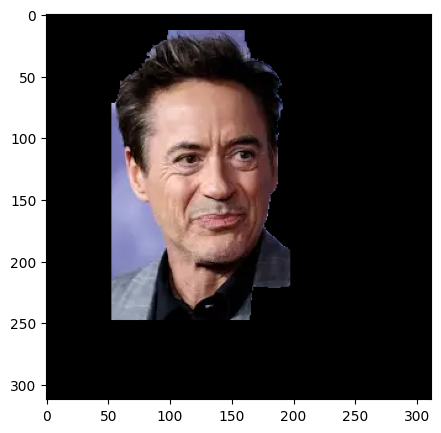

In [69]:
bgdModel = np.zeros((1, 65), np.float64)  # 1x65 boyutunda
fgdModel = np.zeros((1, 65), np.float64)  # 1x65 boyutunda

cv2.grabCut(imgCopy, mask, rect, bgdModel, fgdModel, 15, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

resultImg = imgCopy*mask2[:,:,np.newaxis]

plt.figure(figsize=(14, 5))
plt.imshow(resultImg[..., ::-1])
plt.show()